# Video Game Sales Analysis

**This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com**

**Fields include**

**Rank** - Ranking of overall sales

**Name** - The games name

**Platform** - Platform of the games release (i.e. PC,PS4, etc.)

**Year** - Year of the game's release

**Genre** - Genre of the game

**Publisher** - Publisher of the game

**NA_Sales** - Sales in North America (in millions)

**EU_Sales** - Sales in Europe (in millions)

**JP_Sales** - Sales in Japan (in millions)

**Other_Sales** - Sales in the rest of the world (in millions)

**Global_Sales** - Total worldwide sales.

# Importing Important Libraries and Loading data

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import re


In [2]:
# files in pwd
!ls

vgsales.csv           videogame_sales.ipynb


In [3]:
games = pd.read_csv("vgsales.csv")

In [4]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
games.shape

(16598, 11)

In [6]:
games.tail(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


## Dealing with null values

In [7]:
# checking null values in dataset
games.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

**Year and publisher contains all the null values of dataframe. To deal with them we have to analyse them carefully**

In [8]:
# rows with null values
games_null = games[games['Year'].isnull()  | games['Publisher'].isnull()]
games_null.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
624,625,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
649,650,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39
652,653,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.54,0.63,0.00,0.22,2.39
711,713,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.00,0.23,2.26
782,784,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11


In [9]:
games_null.shape[0]

307

In [10]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Year is a float value and Publisher is a string object

# Q1) Which Publisher sold most games

In [11]:
#lets fill nan by "null"
games['Publisher'].fillna('null',inplace = True)
games['Publisher'].isna().sum()

0

In [12]:
top_50_best_selling_publishers = games.groupby('Publisher').sum().sort_values(by = 'Global_Sales', ascending = False)
top_50_best_selling_publishers.reset_index()
top_50_best_selling_publishers[['Global_Sales']].head()

,Global_Sales
Publisher,
Nintendo,1786.56
Electronic Arts,1110.32
Activision,727.46
Sony Computer Entertainment,607.50
Ubisoft,474.72


In [13]:
top_50_best_selling_publishers.index[:50]

Index(['Nintendo', 'Electronic Arts', 'Activision',
       'Sony Computer Entertainment', 'Ubisoft', 'Take-Two Interactive', 'THQ',
       'Konami Digital Entertainment', 'Sega', 'Namco Bandai Games',
       'Microsoft Game Studios', 'Capcom', 'Atari',
       'Warner Bros. Interactive Entertainment', 'Square Enix',
       'Disney Interactive Studios', 'Eidos Interactive', 'LucasArts',
       'Bethesda Softworks', 'Midway Games', 'Acclaim Entertainment',
       'Vivendi Games', 'SquareSoft', '505 Games', 'Tecmo Koei', 'Codemasters',
       'Virgin Interactive', 'Unknown', 'Enix Corporation', 'Deep Silver',
       'GT Interactive', 'D3Publisher', 'Sony Computer Entertainment Europe',
       'Hudson Soft', 'MTV Games', 'Universal Interactive', 'Banpresto',
       'Rising Star Games', 'Infogrames', 'Majesco Entertainment',
       'Hasbro Interactive', 'null', 'Nippon Ichi Software', '989 Studios',
       'Zoo Digital Publishing', 'Atlus', 'Level 5', 'Empire Interactive',
       'ASCII Ente

Text(0.5, 1.0, 'TOP 50 BEST SELLING PUBLISHERS')

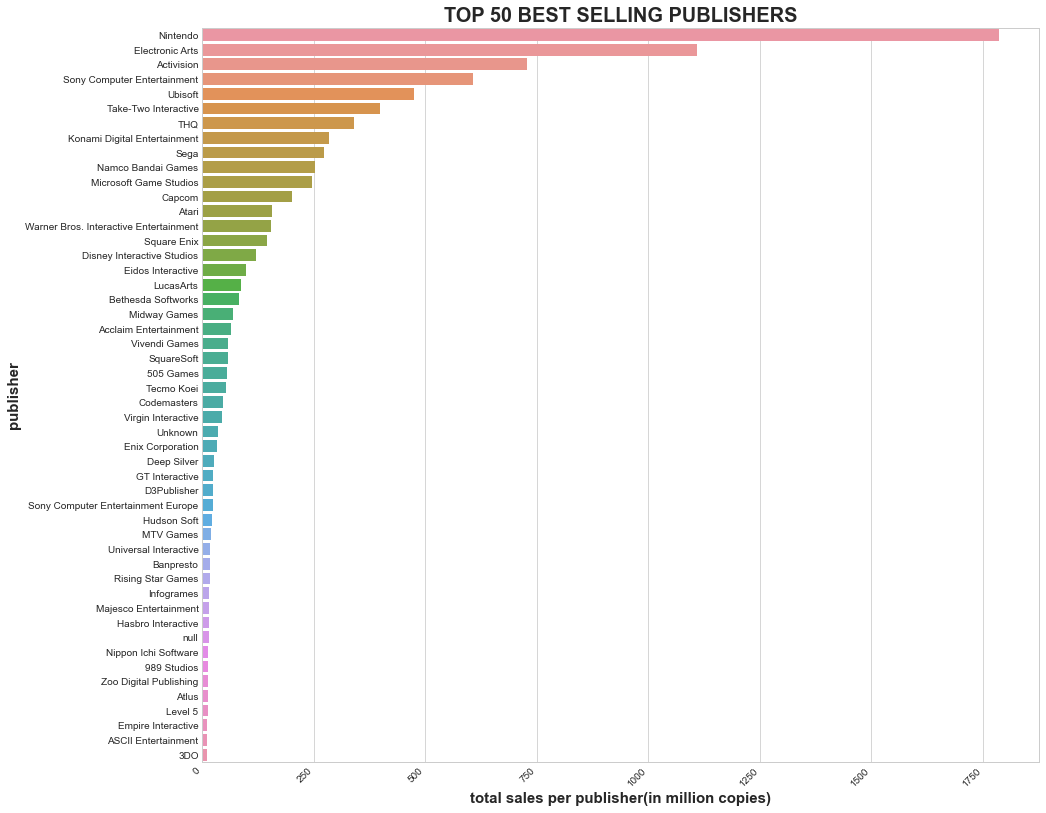

In [14]:
# lets see how important is publisher to users who buy games 
plt.style.use("seaborn-whitegrid")
fig = plt.figure(figsize = (15,15) )
sns.barplot(data = top_50_best_selling_publishers.head(50), x = 'Global_Sales',y = top_50_best_selling_publishers.index[:50], orient = 'h')
fig.autofmt_xdate(rotation=45)
plt.ylabel("publisher", fontweight = "bold", fontsize = 15)
plt.xlabel("total sales per publisher(in million copies)", fontweight = "bold", fontsize = 15)
plt.title("TOP 50 BEST SELLING PUBLISHERS",fontweight = "bold", fontsize = 20)

Here we see that NaN values marked as ("null") did not contribute much to sales

In [15]:
null_publisher_contribution = top_50_best_selling_publishers.loc['null']['Global_Sales'] / top_50_best_selling_publishers['Global_Sales'].sum()
print("null publishers contributed only",round(null_publisher_contribution*100,2),"% hence its better to drop these null values")


null publishers contributed only 0.17 % hence its better to drop these null values


In [16]:
games.drop(games.loc[games['Publisher'] == "null"].index, inplace=True)

In [17]:
games.shape[0]

16540

### Year analysis

Text(0.5, 1.0, ' PDF of year')

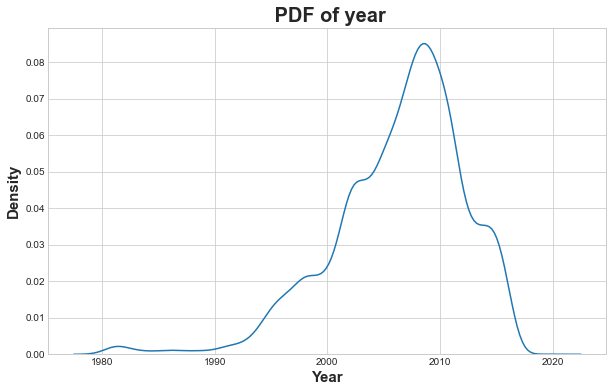

In [18]:
plt.figure(figsize = (10,6))
sns.kdeplot(games['Year'])
plt.xlabel("Year", fontsize = 15, fontweight = "bold")
plt.ylabel("Density", fontsize = 15, fontweight = "bold")
plt.title(" PDF of year", fontweight = "bold", fontsize = 20)

This distribution is a left skewed distribution with kurtosis > 3 which suggests that although most of the games were sold from 2008 to 2015, still there are many games even as early as 1980 which did dont sell much copies (which is understandable as gaming industry had not boomed then).

### Lets see correlation of year with Global sales


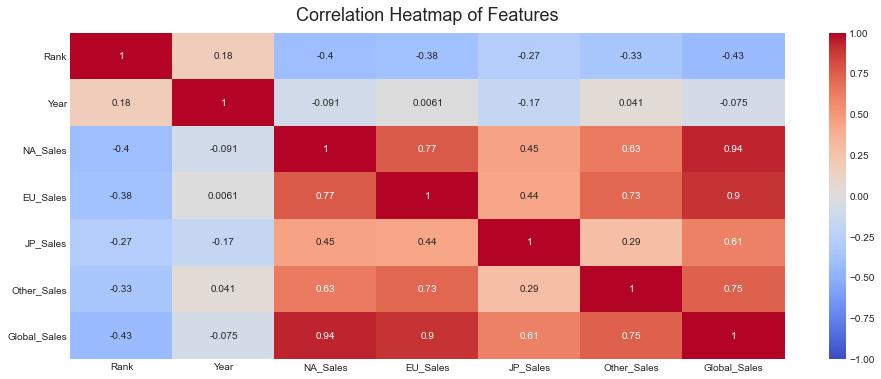

In [19]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(games.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap of Features', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
#plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')


Text(0.5, 1.0, 'Year vs Global Sales')

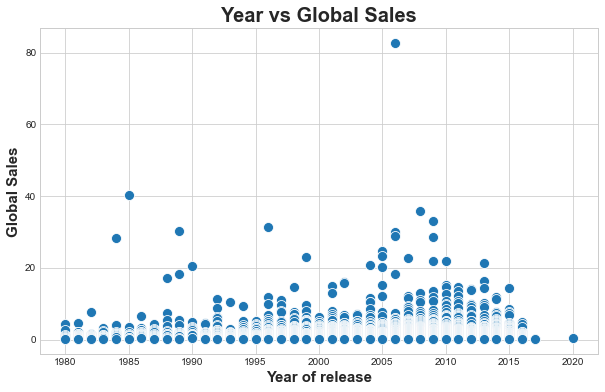

In [20]:
# scatter plot 
plt.figure(figsize = (10,6))
sns.scatterplot(data = games, x = 'Year', y = "Global_Sales", s = 100)
plt.ylabel("Global Sales", fontweight = "bold", fontsize = 15)
plt.xlabel("Year of release", fontweight = "bold", fontsize = 15)
plt.title("Year vs Global Sales",fontweight = "bold", fontsize = 20)

**Here we see can that year has almost 0 correlation with Global Sales, so year alone does not give any useful information**

# Q2) How many games did each platform sell

In [22]:
most_popular_platforms = (games.groupby('Platform').sum()).sort_values(by = 'Global_Sales',ascending =False)
most_popular_platforms.head(10)

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,,,
PS2,16151343,4263750.0,582.17,338.19,139.20,193.00,1252.43
X360,8403095,2480191.0,601.04,280.54,12.42,85.54,979.89
PS3,8995598,2622109.0,392.26,343.23,79.92,141.93,957.29
Wii,10237972,2591562.0,507.56,268.33,69.21,80.60,926.36
DS,20749167,4279469.0,390.67,194.63,175.34,60.53,822.19
PS,8295976,2375627.0,335.65,213.02,139.78,40.80,729.07
GBA,6947519,1574496.0,181.85,73.15,47.06,7.62,310.29
PSP,12592777,2404440.0,108.93,68.25,76.67,42.19,296.10
PS4,2562189,677042.0,96.80,123.70,14.30,43.36,278.10


Text(0.5, 1.0, 'TOP 10 BEST SELLING PLATFORMS')

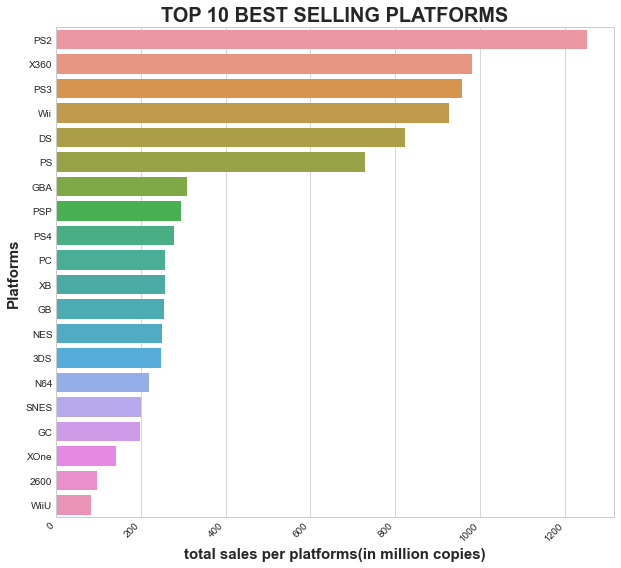

In [23]:
fig = plt.figure(figsize = (10,10) )
sns.barplot(data = most_popular_platforms.head(20), x = 'Global_Sales',y = most_popular_platforms.index[:20], orient = 'h')
fig.autofmt_xdate(rotation=45)
plt.ylabel("Platforms", fontweight = "bold", fontsize = 15)
plt.xlabel("total sales per platforms(in million copies)", fontweight = "bold", fontsize = 15)
plt.title("TOP 10 BEST SELLING PLATFORMS",fontweight = "bold", fontsize = 20)

Here we can easily see that the top 5 platforms contributed most of the games from 1980 - 2020

-> Most number of games till now has bought for Playstation 2 (Sony) which is understandable as PS2 was released in 2000 

-> Microsoft has sold more games after PS2 for its Xbox 360. 

-> Sony's PS3 has sold almost as many games as Xbox 360.

-> Nintendo's Wii and DS are next in line.

-> PS is next with almost 700 million copies

**Most Interesting thing to note here is that out of top 5 best selling platform, 3 are sony's platform**

**This gives us a clear idea that users prefer Playstaion more than other platforms**


# Q3) Which genres are loved the most in gaming community?

In [53]:
most_popular_genre = (games.groupby('Genre').sum()).sort_values(by = 'Global_Sales',ascending =False)
most_popular_genre.head(10)

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,26361435,6527703.0,877.54,524.92,159.49,187.35,1750.33
Sports,17392047,4620621.0,682.54,376.30,135.25,134.87,1329.35
Shooter,9623676,2571588.0,582.59,313.24,38.28,102.69,1037.32
Role-Playing,12002392,2950365.0,327.28,188.05,352.26,59.61,927.31
Platform,6118339,1753335.0,447.05,201.13,130.77,51.59,830.87
Misc,14667633,3384308.0,404.67,213.93,107.72,75.22,802.15
Racing,9927387,2455923.0,359.42,238.38,56.69,77.27,732.03
Fighting,6476418,1675871.0,221.92,100.22,87.35,36.24,445.70
Simulation,7426751,1701558.0,183.31,113.20,63.64,31.52,391.96


Text(0.5, 1.0, 'TOP 20 BEST SELLING GENRE')

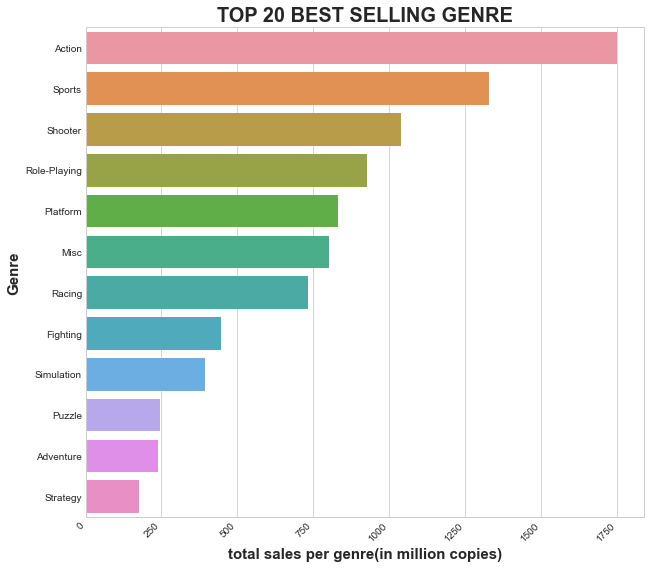

In [54]:
fig = plt.figure(figsize = (10,10) )
sns.barplot(data = most_popular_genre.head(20), x = 'Global_Sales',y = most_popular_genre.index[:20], orient = 'h')
fig.autofmt_xdate(rotation=45)
plt.ylabel("Genre", fontweight = "bold", fontsize = 15)
plt.xlabel("total sales per genre(in million copies)", fontweight = "bold", fontsize = 15)
plt.title("TOP 20 BEST SELLING GENRE",fontweight = "bold", fontsize = 20)

**Here we cans ee that people love to play action games the most followed by sports, shooter, role-playing, platform etc.**

# Q4) Which area sold most games from 1980 - 2020 ?

No handles with labels found to put in legend.


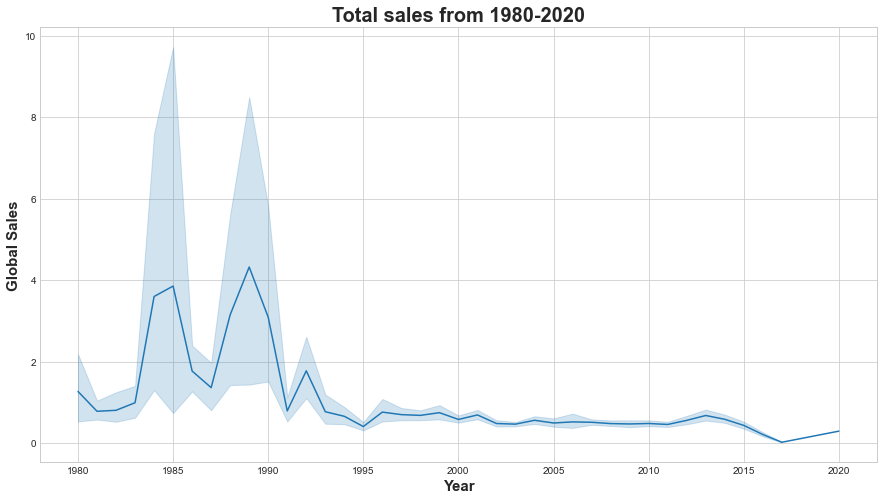

In [63]:
plt.figure(figsize = (15,8))
sns.lineplot(data = games, x = 'Year', y = 'Global_Sales')
plt.xlabel("Year", fontsize = 15, fontweight = "bold")
plt.ylabel("Global Sales", fontsize = 15, fontweight = "bold")
plt.title("Total sales from 1980-2020", fontsize = 20, fontweight = "bold")
plt.legend(fontsize = 15)

**We see that after 1983 global sales shot up and reaches an overall high during 1987-1988. After 1988 a sharp decline is observed and since then it is on an overall declining trend compared to before**

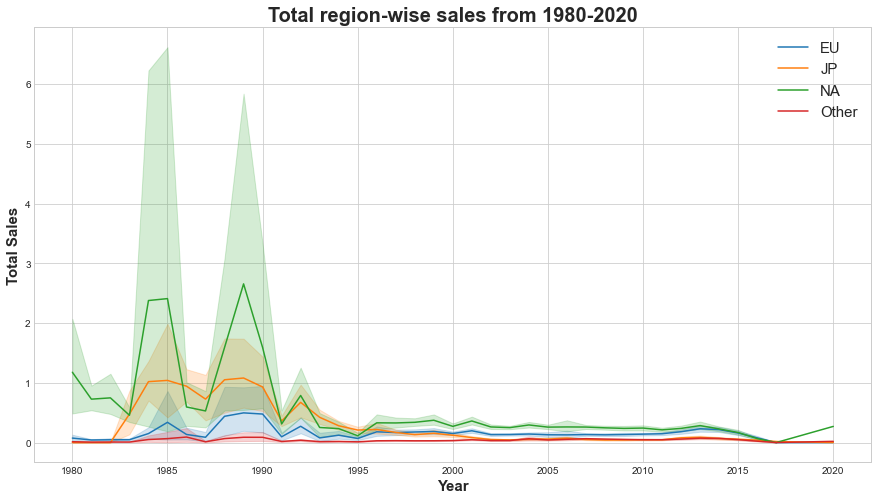

In [59]:
plt.figure(figsize = (15,8))
sns.lineplot(data = games, x = 'Year', y = 'EU_Sales', label = 'EU')
sns.lineplot(data = games, x = 'Year', y = 'JP_Sales', label = "JP")
sns.lineplot(data = games, x = 'Year', y = 'NA_Sales', label = "NA")
sns.lineplot(data = games, x = 'Year', y = 'Other_Sales', label = "Other")
plt.xlabel("Year", fontsize = 15, fontweight = "bold")
plt.ylabel("Total Sales", fontsize = 15, fontweight = "bold")
plt.title("Total region-wise sales from 1980-2020", fontsize = 20, fontweight = "bold")
plt.legend(fontsize = 15)

**Here we can see that from 1980 - 1992. Video game sales in North American region were fairly large as compared to all other regions. Japan was the runner up**

**From 1992 - 1995 sales in north america saw a decline and Japan was the leader in terms of sales.**

### Sales per region from 1995-2020

In [60]:
df_last_25_years = games[games['Year'] >= 1995]
df_last_25_years.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01


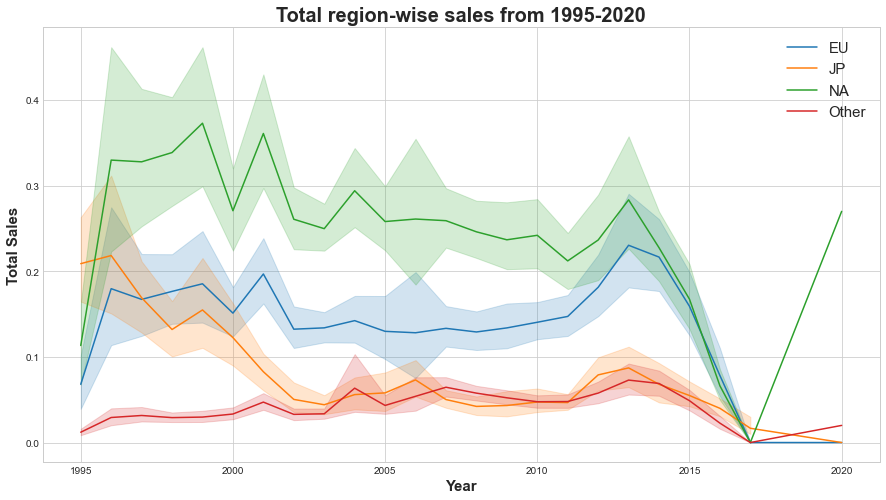

In [62]:
plt.figure(figsize = (15,8))
sns.lineplot(data = df_last_25_years, x = 'Year', y = 'EU_Sales', label = 'EU')
sns.lineplot(data = df_last_25_years, x = 'Year', y = 'JP_Sales', label = "JP")
sns.lineplot(data = df_last_25_years, x = 'Year', y = 'NA_Sales', label = "NA")
sns.lineplot(data = df_last_25_years, x = 'Year', y = 'Other_Sales', label = "Other")
plt.xlabel("Year", fontsize = 15, fontweight = "bold")
plt.ylabel("Total Sales", fontsize = 15, fontweight = "bold")
plt.title("Total region-wise sales from 1995-2020", fontsize = 20, fontweight = "bold")
plt.legend(fontsize = 15)

**We can see that the sales in japan region saw a sharp decline after 1995 where as sales in europen region has increased compared to Japan and other countries while sales in North america remained the highest among all regions.**

**During 2013-2017 sales in every region declined** 

**After 2017 sales in North America massively shot up compared to other regions whereas sales in Japan and europe were all time low. Sales in other region also saw an increasing trend since 2017**


